In [2]:
# compatibilité python 2 et python 3
from __future__ import division, print_function, unicode_literals

# imports
import numpy as np
import os

# stabilité du notebook d'une exécution à l'autre
np.random.seed(42)

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# ignorer les warnings inutiles (voir SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Le code de chargement du fichier.

In [23]:
from scipy import misc
from os import listdir
from os.path import isfile, join
import imageio
import matplotlib.pyplot as plt
import numpy as np
import scipy

"""I'd rather list all files and read them myself than use a lib that reads every file since i don't need all of them"""
def load_images(folder, nb_images) :
    img_list = []
    #go to the right path
    folder = join("projectdataset", "livrable1", folder)
    folder_path = join(os.getcwd(), folder)
    #list files in folder
    files = [f for f in listdir(folder_path) 
             if isfile(join(folder_path, f))]
    #Iterate nb_images times
    for i in range(nb_images) :
        #Load image
        img = imageio.imread(join(folder_path, files[i]))
        #Add it the the list
        img_list.append(img)
    return img_list

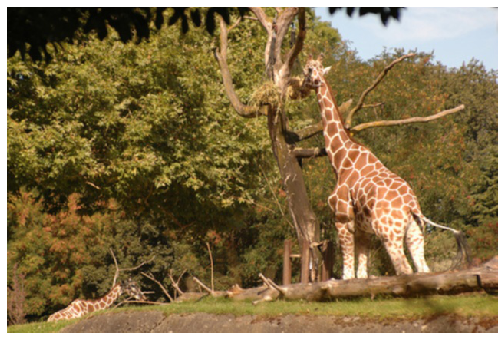

In [24]:
im = load_images("Blurry", 5)[0]
plt.figure(figsize=(18, 6))
plt.axis('off')
plt.imshow(im)
plt.show()

## Le code du débruitage sur un sous-ensemble d’images bruitées.

In [ ]:
#load les images (")")
#bruiter l'image à la mano
#appliquer des filtres
    #median
    #gaussian

explication

## Le code de l’affutage sur un sous-ensembles d’images floutées.

In [ ]:
#load les images (3)
#flouter l'image à la mano
#appliquer des filtres
    #laplacian
    #sobel (c'est peut être déjà un laplacien sobel, à voir)
    #fourier

explication du code

## Une étude de cas explicitant les compromis entre ces deux opérations. Cette partie du livrable doit inclure le bruitage d’images et montrer la perte de détails, ou l’affutage d’images et montrer l’apparition du bruit.

### Bruitage d'images

In [ ]:
#bruiter l'image
    #blur
    #parasites
#soustraire ori et processed
#on devrait voir les zones de détails perdus

### Affutage d'images

In [ ]:
#gaussian blur


#laplacian
#sobel (c'est peut être déjà un laplacien sobel, à voir)
#fourier

#soustr 

### Explication des compromis

In [ ]:
#code commenté